In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder


### MARIA FERNANDA MORALES ALVAREZ CARNET: 22007685

In [59]:
dataHP = pd.read_csv('train_hp.csv')
dataHP.shape

(1460, 81)

In [42]:
dataHP.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
dataHP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [44]:
dataHP.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
dataHP.isna().sum()/dataHP.shape[0]*100

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64

In [46]:
dataHP.isnull().mean()

Id               0.000000
MSSubClass       0.000000
MSZoning         0.000000
LotFrontage      0.177397
LotArea          0.000000
                   ...   
MoSold           0.000000
YrSold           0.000000
SaleType         0.000000
SaleCondition    0.000000
SalePrice        0.000000
Length: 81, dtype: float64

In [65]:
cols_con_na = [col for col in dataHP if (dataHP[col].isnull().mean() > 0)]
cols_con_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [66]:
dataHP[cols_con_na].dtypes

LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object

In [67]:
prop_nan_per_col=dataHP[cols_con_na].isnull().mean()
prop_nan_per_col

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

### Complete Case Analysis (CCA)

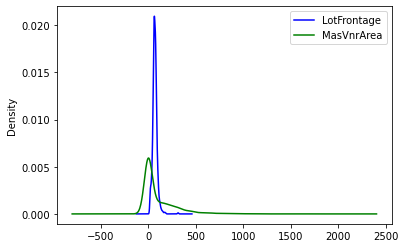

In [69]:
dataHP['LotFrontage'].plot.density(color='blue', label='LotFrontage')
dataHP['MasVnrArea'].plot.density(color='green', label='MasVnrArea')

plt.legend()
plt.show()

### Imputación

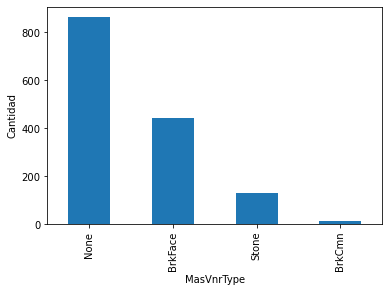

In [70]:
dataHP['MasVnrType'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("MasVnrType")
plt.show()

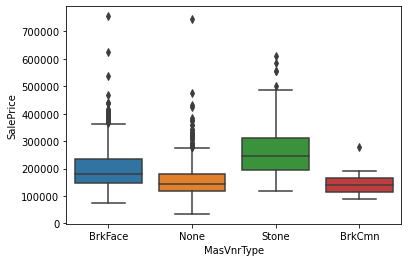

In [71]:
import seaborn as sns
sns.boxplot(x=dataHP['MasVnrType'], y=dataHP['SalePrice'])
plt.show()

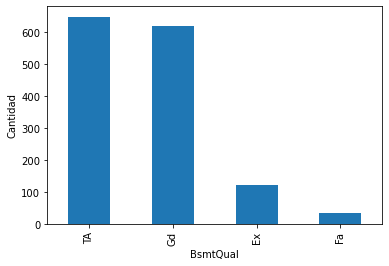

In [72]:
dataHP['BsmtQual'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

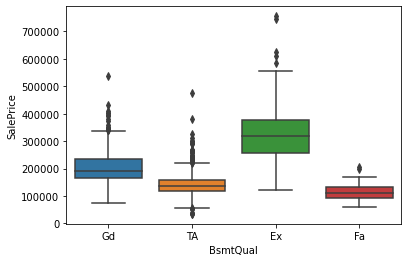

In [73]:
sns.boxplot(x=dataHP['BsmtQual'], y=dataHP['SalePrice'])
plt.show()

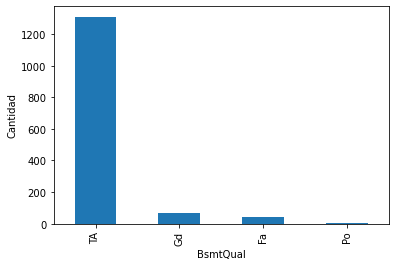

In [74]:
dataHP['BsmtCond'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtQual")
plt.show()

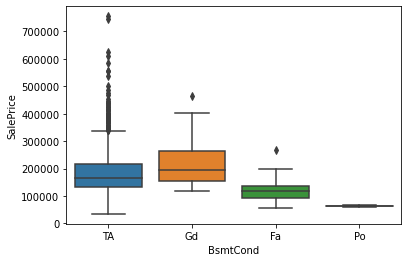

In [75]:
sns.boxplot(x=dataHP['BsmtCond'], y=dataHP['SalePrice'])
plt.show()

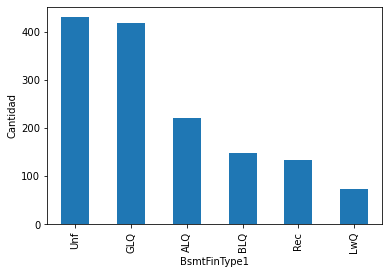

In [76]:
dataHP['BsmtFinType1'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("BsmtFinType1")
plt.show()

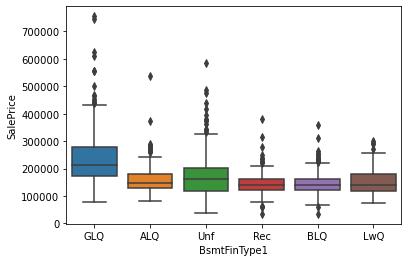

In [77]:
sns.boxplot(x=dataHP['BsmtFinType1'], y=dataHP['SalePrice'])
plt.show()

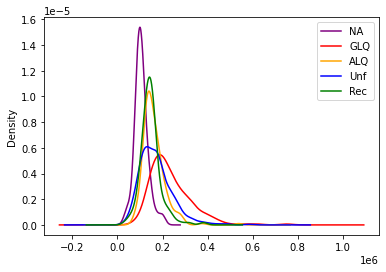

In [80]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['BsmtFinType1'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="NA")
dataHP[dataHP['BsmtFinType1'] == 'GLQ']['SalePrice'].plot(kind="kde", color="red", label="GLQ")
dataHP[dataHP['BsmtFinType1'] == 'ALQ']['SalePrice'].plot(kind="kde", color="orange", label="ALQ")
dataHP[dataHP['BsmtFinType1'] == 'Unf']['SalePrice'].plot(kind="kde", color="blue", label="Unf")
dataHP[dataHP['BsmtFinType1'] == 'Rec']['SalePrice'].plot(kind="kde", color="green", label="Rec")
ax.legend()

plt.show()

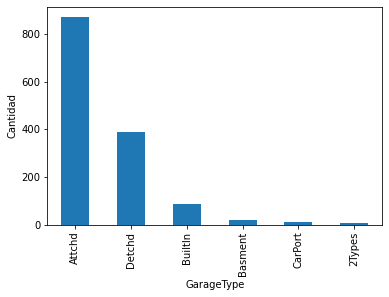

In [82]:
dataHP['GarageType'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageType")
plt.show()

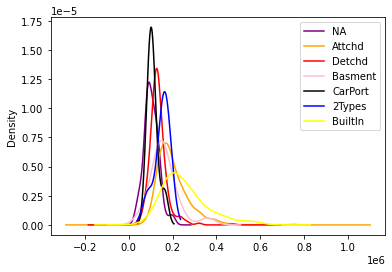

In [83]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['GarageType'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="NA")
dataHP[dataHP['GarageType'] == 'Attchd']['SalePrice'].plot(kind="kde", color="orange", label="Attchd")
dataHP[dataHP['GarageType'] == 'Detchd']['SalePrice'].plot(kind="kde", color="red", label="Detchd")
dataHP[dataHP['GarageType'] == 'Basment']['SalePrice'].plot(kind="kde", color="pink", label="Basment")
dataHP[dataHP['GarageType'] == 'CarPort']['SalePrice'].plot(kind="kde", color="black", label="CarPort")
dataHP[dataHP['GarageType'] == '2Types']['SalePrice'].plot(kind="kde", color="blue", label="2Types")
dataHP[dataHP['GarageType'] == 'BuiltIn']['SalePrice'].plot(kind="kde", color="yellow", label="BuiltIn")

ax.legend()

plt.show()

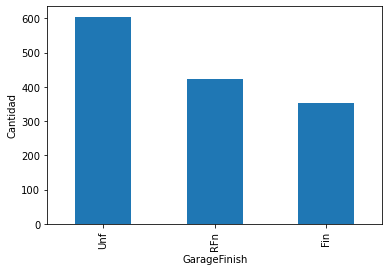

In [84]:
dataHP['GarageFinish'].value_counts().plot.bar()
plt.ylabel("Cantidad")
plt.xlabel("GarageFinish")
plt.show()

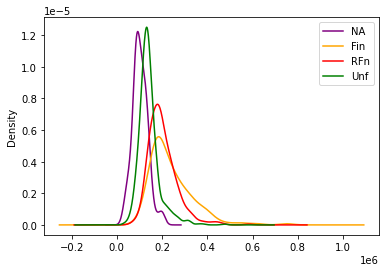

In [85]:
fig = plt.figure()

ax = fig.add_subplot(111)

dataHP[dataHP['GarageFinish'].isnull()]['SalePrice'].plot(kind="kde", color="purple", label="NA")
dataHP[dataHP['GarageFinish'] == 'Fin']['SalePrice'].plot(kind="kde", color="orange", label="Fin")
dataHP[dataHP['GarageFinish'] == 'RFn']['SalePrice'].plot(kind="kde", color="red", label="RFn")
dataHP[dataHP['GarageFinish'] == 'Unf']['SalePrice'].plot(kind="kde", color="green", label="Unf")


ax.legend()

plt.show()

### CODIFICACIÓN DE LAS VARIABLES

In [86]:
def getCategoryVars(datasetHP):
     cat_colnames = []
     colnames = datasetHP.columns
     for col in colnames:
          if(datasetHP[col].dtype == 'object'):
               cat_colnames.append(col)
     return cat_colnames

In [87]:
cat_cols = getCategoryVars(dataHP)
cat_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [88]:
datasetHP_categories = dataHP[cat_cols]
datasetHP_categories.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [91]:
datasetHP_categories['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [98]:
pd.get_dummies(datasetHP_categories['MasVnrType'])

,BrkCmn,BrkFace,None,Stone
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,1,0,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,0,1
1457,0,0,1,0
1458,0,0,1,0


In [92]:
datasetHP_categories['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [99]:
pd.get_dummies(datasetHP_categories['BsmtQual'])

,Ex,Fa,Gd,TA
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,1,0
1457,0,0,0,1
1458,0,0,0,1


In [93]:
datasetHP_categories['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [100]:
pd.get_dummies(datasetHP_categories['BsmtCond'])

,Fa,Gd,Po,TA
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,1,0,0
1458,0,0,0,1


In [94]:
datasetHP_categories['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [101]:
pd.get_dummies(datasetHP_categories['BsmtExposure'])

,Av,Gd,Mn,No
0,0,0,0,1
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
...,...,...,...,...
1455,0,0,0,1
1456,0,0,0,1
1457,0,0,0,1
1458,0,0,1,0


In [95]:
datasetHP_categories['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [102]:
pd.get_dummies(datasetHP_categories['BsmtFinType1'])

,ALQ,BLQ,GLQ,LwQ,Rec,Unf
0,0,0,1,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1455,0,0,0,0,0,1
1456,1,0,0,0,0,0
1457,0,0,1,0,0,0
1458,0,0,1,0,0,0


In [96]:
datasetHP_categories['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [103]:
pd.get_dummies(datasetHP_categories['Electrical'])

,FuseA,FuseF,FuseP,Mix,SBrkr
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
1455,0,0,0,0,1
1456,0,0,0,0,1
1457,0,0,0,0,1
1458,1,0,0,0,0


In [97]:
datasetHP_categories['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [104]:
pd.get_dummies(datasetHP_categories['GarageQual'])

,Ex,Fa,Gd,Po,TA
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
1455,0,0,0,0,1
1456,0,0,0,0,1
1457,0,0,0,0,1
1458,0,0,0,0,1
